In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

Label	Description<br>
**0**	T-shirt/top <br>
**1**	Trouser<br>
**2**	Pullover<br>
**3**	Dress<br>
**4**	Coat<br>
**5**	Sandal<br>
**6**	Shirt<br>
**7**	Sneaker<br>
**8**	Bag<br>
**9**	Ankle boot<br>


In [88]:
from tensorflow.keras.datasets import fashion_mnist
data = fashion_mnist
(x_train,y_train),(x_test,y_test) = data.load_data()

In [89]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [90]:
#Parameter
n_cls = 10
batch_size = 500
num_itaration = 3000
learning_rate = 0.001
num_feature = int(28*28)
display_info = 100

hidden_layer_1 = 128
hidden_layer_2 = 256


In [91]:
#Reshape and convert to float32
x_train = np.array(x_train,dtype=np.float32)
x_test = np.array(x_test,dtype=np.float32)  # Corrected: use original x_test

x_train = x_train.reshape([-1,num_feature])
x_test = x_test.reshape([-1,num_feature]) # Corrected: reshape x_test

x_train = x_train/255
x_test = x_test/255 # Corrected: divide x_test by 255

In [92]:
x_train.shape

(60000, 784)

In [93]:
train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [94]:
#Assign the h1 and w1
random_normal = tf.initializers.random_normal()
weights = {
    "h1" : tf.Variable(random_normal([num_feature,hidden_layer_1])),
    "h2" : tf.Variable(random_normal([hidden_layer_1,hidden_layer_2])),
    "Out" : tf.Variable(random_normal([hidden_layer_2,n_cls]))
}
bias = {
    "h1": tf.Variable(random_normal([hidden_layer_1,1])),
    "h2" : tf.Variable(random_normal([hidden_layer_2,1])),
    "out" : tf.Variable(random_normal([n_cls,1]))
}



In [95]:
def neural_net(x):

  layer_1 = tf.add(tf.matmul(x,weights["h1"]),tf.transpose(bias["h1"]))
  layer_1 = tf.nn.sigmoid(layer_1)

  layer_2 = tf.add(tf.matmul(layer_1,weights["h2"]),tf.transpose(bias["h2"]))
  layer_2 = tf.nn.sigmoid(layer_2)

  output_layer = tf.add(tf.matmul(layer_2,weights["Out"]),tf.transpose(bias["out"]))
  output_layer = tf.nn.softmax(output_layer)

  return output_layer

In [96]:
def loss_fun(y_pred,y_train):
  y_true = tf.one_hot(y_train,depth=n_cls)
  y_pred = tf.clip_by_value(y_pred,1e-9,1.)

  return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))


In [97]:
def accuracy(y_pred,y_true):
  correct_pred = tf.equal(tf.argmax(y_pred, axis=1),tf.cast(y_true,tf.int64))
  return tf.reduce_mean(tf.cast(correct_pred,tf.float32))

In [98]:
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

In [99]:
def run_optimization(batch_x,batch_y):
  with tf.GradientTape() as g:
    pred = neural_net(batch_x)
    loss = loss_fun(pred,batch_y)

  trainable_variables = list(weights.values()) + list(bias.values())
  gradients = g.gradient(loss,trainable_variables)
  optimizer.apply_gradients(zip(gradients,trainable_variables))


In [100]:
for step,(batch_x,batch_y) in enumerate(train_data.take(num_itaration),1):
  run_optimization(batch_x,batch_y)

  if step % display_info == 0:
    pred = neural_net(batch_x)
    loss = loss_fun(pred,batch_y)
    acc = accuracy(pred,batch_y)
    print(f"Step: {step} Loss: {loss} accuracy: {acc}")

Step: 100 Loss: 662.2119750976562 accuracy: 0.5019999742507935
Step: 200 Loss: 445.8636474609375 accuracy: 0.6439999938011169
Step: 300 Loss: 366.5251159667969 accuracy: 0.6980000138282776
Step: 400 Loss: 350.52362060546875 accuracy: 0.7179999947547913
Step: 500 Loss: 280.82867431640625 accuracy: 0.7699999809265137
Step: 600 Loss: 283.4931640625 accuracy: 0.8040000200271606
Step: 700 Loss: 241.14691162109375 accuracy: 0.8360000252723694
Step: 800 Loss: 281.41888427734375 accuracy: 0.7580000162124634
Step: 900 Loss: 232.96115112304688 accuracy: 0.8119999766349792
Step: 1000 Loss: 262.8181457519531 accuracy: 0.8240000009536743
Step: 1100 Loss: 237.4545440673828 accuracy: 0.8159999847412109
Step: 1200 Loss: 217.26055908203125 accuracy: 0.843999981880188
Step: 1300 Loss: 224.7599639892578 accuracy: 0.8379999995231628
Step: 1400 Loss: 256.9032897949219 accuracy: 0.8259999752044678
Step: 1500 Loss: 210.78121948242188 accuracy: 0.8500000238418579
Step: 1600 Loss: 230.54940795898438 accuracy: 

In [101]:
pred = neural_net(x_test)
print(f"accuracy: {accuracy(pred,y_test)}")

accuracy: 0.8511000275611877


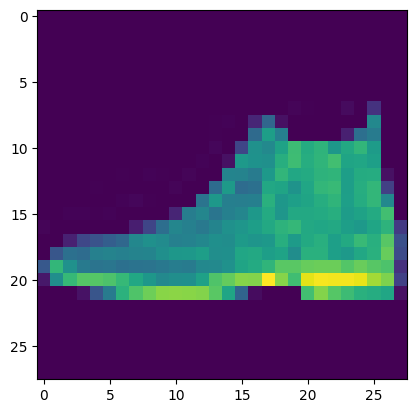

Prediction value 9


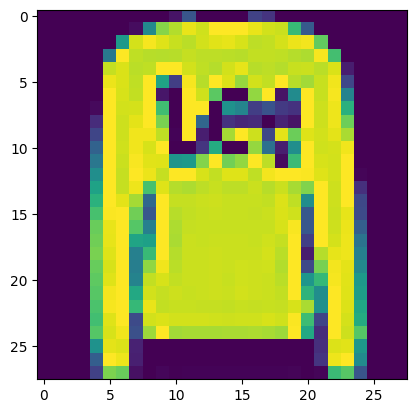

Prediction value 2


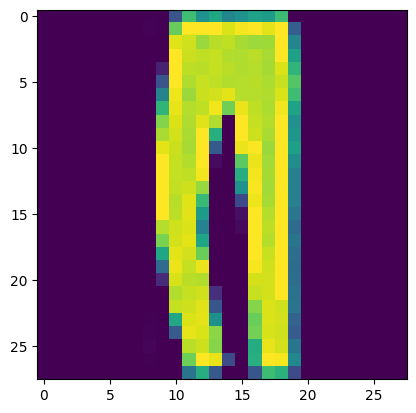

Prediction value 1


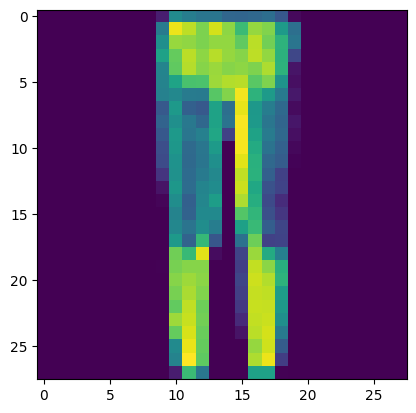

Prediction value 1


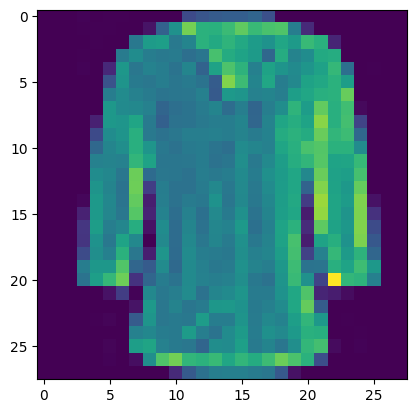

Prediction value 6


In [105]:
test_size = 5
test_image = x_test[:test_size]
pred = neural_net(test_image)
for i in range(5):
  plt.imshow(np.reshape(test_image[i],[28,28]))
  plt.show()
  print(f"Prediction value {tf.argmax(pred.numpy()[i])}")